# Name: Ashok Vaktariya

GitHub: https://github.com/ashokdhakad

Kaggle: https://www.kaggle.com/ashokvaktariya

My Portfolio Site: https://ashokvaktariya.me/


# The Sparks Foundation
# GRIP: Data Science & Business Analytics Intern
# Prediction using Unsupervised ML 
# Task 2

From the given 'Iris' dataset,predict the optimum number of clusters and represent it visually.



### importing Libraries

In [1]:
import pandas as pd #IMPORTING PANDAS 
import numpy as np #IMPORTING NUMPY 
import matplotlib.pyplot as plt #IMPORTING VISUALIZATION LIBRARY 
import seaborn as sns #IMPORTING VISUALIZATION LIBRARY 
from sklearn.model_selection import train_test_split #TEST TRAIN SPLIT
from sklearn.cluster import KMeans #IMPORTING KMEANS

### Reading csv file and assigning to dataset variables

In [6]:
dataset=pd.read_csv('Iris.csv')

### getting brief overview of the dataset
##### -number of columns and rows (shape of dataset)
##### -columns names and its dtype
##### -how many non-null values it has and memory usage.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### first 10 rows content of the dataset

In [8]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Dropping unwanted column

In [9]:
dataset.drop('Id',inplace=True,axis=1)

### Analysing the dataset

In [11]:
#dimensions of dataset
dataset.shape

(150, 5)

In [12]:
#number of duplicated values
dataset.duplicated().sum()

3

In [13]:
#rows contain null values
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
#information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [15]:
#Descriptive analysis
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#Correlation
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [17]:
#Count of each unique species
dataset['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#### REMOVING DUPLICATE VALUES:

In [18]:
pd.DataFrame.drop_duplicates(dataset)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Finding suitable number of clusters with the help of elbow plot

In [19]:
x=dataset.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### Visualizing results through elbow plot


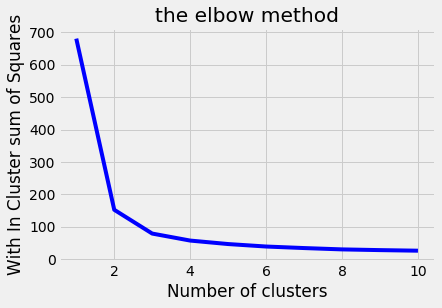

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),wcss,color='blue')
plt.title('the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('With In Cluster sum of Squares')
plt.show()

#### From the above plot it is very much clear that the optimal number of clusters for clustering is 3.

## The K-Means Workshop

In [26]:
kmeans=KMeans(n_clusters=3,init='k-means++',
             max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the clusters

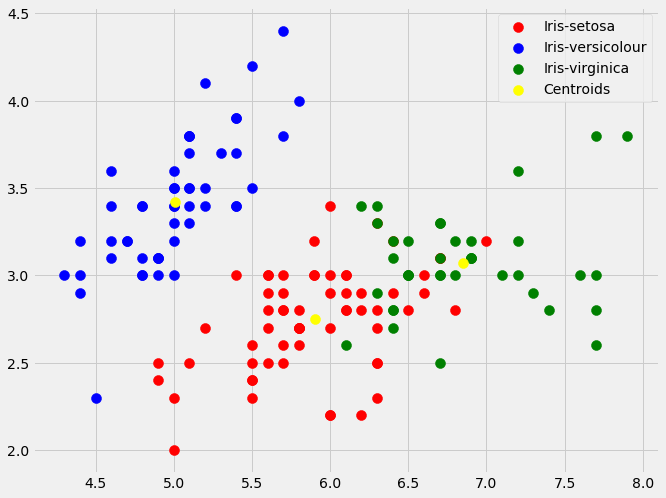

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red',
            label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue',
            label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green',
            label = 'Iris-virginica')

#CENTROIDS:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()